#  **Unlocking Real Estate Insights: Machine Learning-Driven House Price Prediction in South Jakarta**

## authors
*Edit Name, ID, GitHub username, and in charge activity for your team. (Point: 5)*

No | Name | ID | GitHub username | In charge activity
:-: | :- | :-: | :- | :-
1 | Deepali Karwa | 10223007 | [deepalikarwa](https://github.com/deepalikarwa) | Discussion on GitHub issues
2 | Zhirui Feng | 10223087 | [ZhiruiFeng](https://github.com/ZhiruiFeng) | Notebook finalization
3 | Tim Errington | 10223009 | [timerrington](https://github.com/timerrington) | Slide on OSF
4 | David Ondrej  | 10223101 | [davidondrej](https://github.com/davidondrej) | YouTube presenation video

## Goals
1. **Memahami Faktor yang Mempengaruhi Harga Rumah**:
    
    - Identifikasi variabel (fitur) utama seperti luas tanah (LT), luas bangunan (LB), jumlah kamar tidur (JKT), dan jumlah kamar mandi (JKM) yang memengaruhi harga rumah.
2. **Membangun Model Prediksi Harga**:
    
    - Mengembangkan model regresi untuk memprediksi harga rumah berdasarkan data fitur yang tersedia.
3. **Mengatasi Permasalahan Data**:
    
    - Menangani outlier dan kesalahan data seperti harga negatif untuk memastikan model tidak bias.
4. **Mengukur Performa Model**:
    
    - Menggunakan metrik seperti **Mean Absolute Error (MAE)**, **Root Mean Squared Error (RMSE)**, atau **R²** untuk mengevaluasi kinerja model.

## Tools
 

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
np.set_printoptions(precision=2)
import matplotlib.pyplot as plt
dlblue = '#0096ff'; dlorange = '#FF9300'; dldarkred='#C00000'; dlmagenta='#FF40FF'; dlpurple='#7030A0'; 
plt.style.use('deeplearning.mplstyle')
from lab_utils_multi import  load_house_data, compute_cost, run_gradient_descent 
from lab_utils_multi import  norm_plot, plt_contour_multi, plt_equal_scale, plot_cost_i_w

from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import StandardScaler
from lab_utils_multi import  load_house_data
import matplotlib.pyplot as plt
dlblue = '#0096ff'; dlorange = '#FF9300'; dldarkred='#C00000'; dlmagenta='#FF40FF'; dlpurple='#7030A0'; 
plt.style.use('deeplearning.mplstyle')

#  Problem Statement

We would like to build a linear regression model using these values so we can then predict the price for other houses - say, a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old. 

##  Dataset: 

In [3]:
# Load dataset from Excel file
file_path = r"C:\00_LEARNING\1. Interest\codingan\StanfordMachineLearningSpecialization-main\StanfordMachineLearningSpecialization-main\Regression and Classification\harga_rumah_jaksel.xlsx"
data = pd.read_excel(file_path)

# Display the first 5 rows of the dataset
print(data.head())

         HARGA    LT   LB  JKT  JKM  GRS    KOTA
0  28000000000  1100  700    5    6  ADA  JAKSEL
1  19000000000   824  800    4    4  ADA  JAKSEL
2   4700000000   500  400    4    3  ADA  JAKSEL
3   4900000000   251  300    5    4  ADA  JAKSEL
4  28000000000  1340  575    4    5  ADA  JAKSEL


1. **LT (Luas Tanah)**:
    
    - Merupakan luas tanah tempat properti berada, biasanya diukur dalam satuan meter persegi (m²).
    - Luas tanah sering menjadi faktor utama yang memengaruhi harga properti, terutama di wilayah perkotaan seperti Jakarta Selatan, di mana lahan menjadi sangat berharga.
2. **LB (Luas Bangunan)**:
    
    - Mengacu pada luas keseluruhan bangunan rumah, juga diukur dalam meter persegi (m²).
    - Semakin besar luas bangunan, biasanya semakin mahal harga rumah, karena mencerminkan kapasitas bangunan untuk dihuni atau digunakan.
3. **JKT (Jumlah Kamar Tidur)**:
    
    - Jumlah kamar tidur dalam rumah.
    - Merupakan indikator penting bagi pembeli rumah yang mencari properti sesuai dengan kebutuhan jumlah anggota keluarga.
4. **JKM (Jumlah Kamar Mandi)**:
    
    - Jumlah kamar mandi dalam rumah.
    - Faktor ini sering diperhitungkan dalam harga rumah karena menunjukkan tingkat kenyamanan dan kemewahan properti.
5. **GRS (Garasi)**:
    
    - Mengacu pada keberadaan garasi untuk kendaraan. Biasanya dinyatakan sebagai:
        - 0: Tidak memiliki garasi.
        - 1: Memiliki garasi.
    - Faktor ini penting terutama di daerah perkotaan, di mana tempat parkir menjadi kebutuhan.
6. **KOTA JAKSEL**:
    
    - Data ini khusus mencakup properti yang berada di wilayah Jakarta Selatan (Jaksel).
    - Jakarta Selatan merupakan salah satu area paling premium di DKI Jakarta, dengan harga tanah dan properti yang relatif lebih tinggi dibandingkan dengan wilayah lain. Faktor lokasi sangat penting karena memengaruhi nilai properti secara signifikan.

Disini kita hanya tertarik pada fitur-fitur yang berjenis data kuantitatif

In [4]:
# Select features and target
X_features = ['LT', 'LB', 'JKT', 'JKM']  # Features: Luas Tanah, Luas Bangunan, Jumlah Kamar Tidur, Jumlah Kamar Mandi
X_train = data[X_features]
y_train = data['HARGA']

# Convert target column (HARGA) to numeric by removing commas and converting to integer
y_train = y_train.replace(',', '', regex=True).astype(int)

# Print the processed data
print("Features (X_train):")
print(X_train.head())
print("\nTarget (y_train):")
print(y_train.head())


Features (X_train):
     LT   LB  JKT  JKM
0  1100  700    5    6
1   824  800    4    4
2   500  400    4    3
3   251  300    5    4
4  1340  575    4    5

Target (y_train):
0   -2064771072
1    1820130816
2     405032704
3     605032704
4   -2064771072
Name: HARGA, dtype: int32


## Sari Grafik dan Sari Numerik (Statistika Deskriptif)

Descriptive Statistics:
                LT            LB          JKT          JKM         HARGA
count  1001.000000   1001.000000  1001.000000  1001.000000  1.001000e+03
mean    530.504496    487.275724     4.457542     3.940060  1.318044e+08
std     531.069773    452.872262     2.004606     1.903261  1.257268e+09
min      22.000000     38.000000     1.000000     1.000000 -2.104967e+09
25%     220.000000    300.000000     4.000000     3.000000 -8.849019e+08
50%     400.000000    411.000000     4.000000     4.000000  2.050327e+08
75%     677.000000    600.000000     5.000000     4.000000  1.230196e+09
max    6790.000000  10000.000000    27.000000    27.000000  2.120131e+09


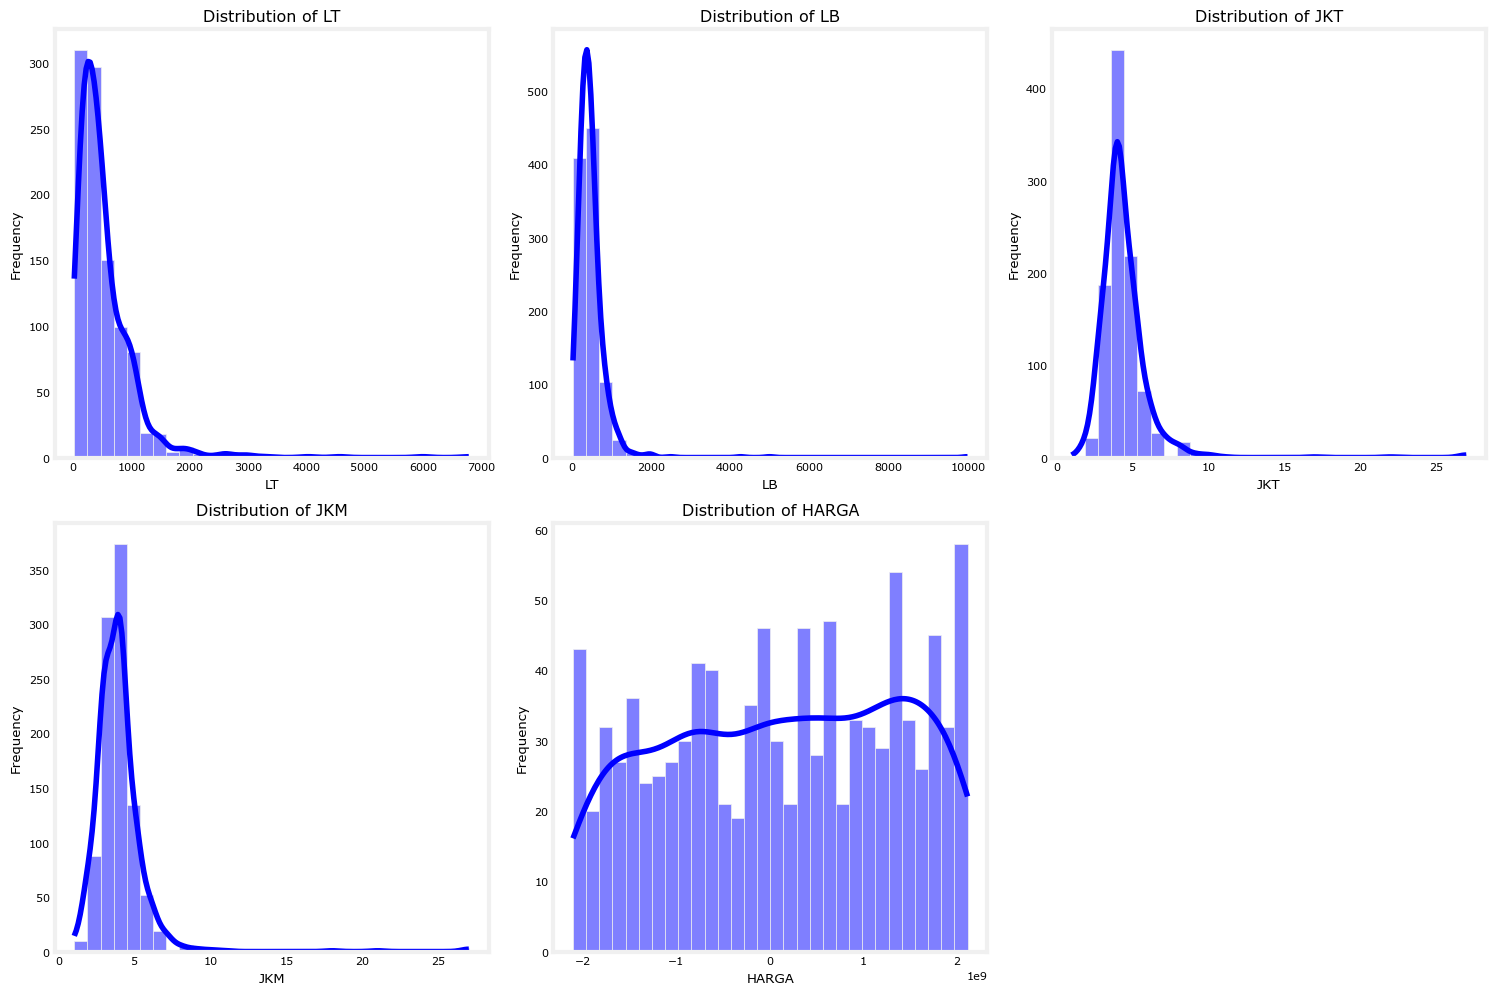

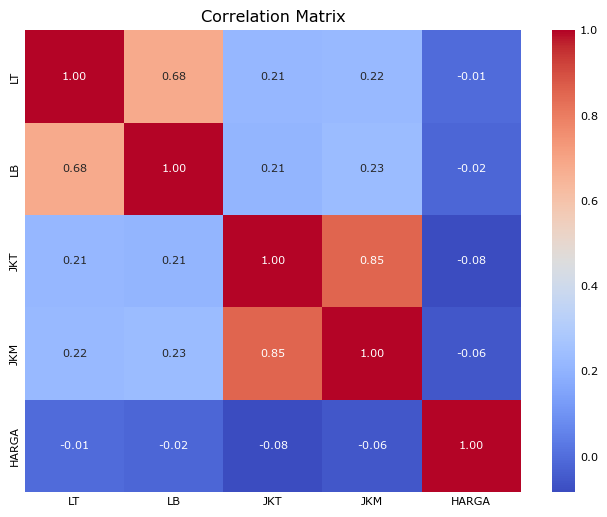

Missing Values:
LT       0
LB       0
JKT      0
JKM      0
HARGA    0
dtype: int64


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data (Assume data is already loaded into the variable `data`)
# Features and target
X_features = ['LT', 'LB', 'JKT', 'JKM']  # Features: Luas Tanah, Luas Bangunan, Jumlah Kamar Tidur, Jumlah Kamar Mandi
X_train = data[X_features]
y_train = data['HARGA']

# Convert target column (HARGA) to numeric
y_train = y_train.replace(',', '', regex=True).astype(int)

# Combine X_train and y_train for EDA
data_combined = X_train.copy()
data_combined['HARGA'] = y_train

# 1. Descriptive Statistics
descriptive_stats = data_combined.describe()
print("Descriptive Statistics:")
print(descriptive_stats)

# 2. Visualize Distributions
plt.figure(figsize=(15, 10))

for i, column in enumerate(X_features + ['HARGA']):
    plt.subplot(2, 3, i + 1)
    sns.histplot(data_combined[column], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# 3. Correlation Matrix
correlation_matrix = data_combined.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# 4. Outlier Analysis
plt.figure(figsize=(15, 10))

for i, column in enumerate(X_features + ['HARGA']):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=data_combined[column], color='orange')
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

# 5. Missing Value Analysis
missing_values = data_combined.isnull().sum()
print("Missing Values:")
print(missing_values)

# 6. Pairplot for Relationships
sns.pairplot(data_combined, vars=X_features + ['HARGA'], diag_kind='kde', corner=True)
plt.show()


## Hasil Statistika Deskriptif
### 1. Distribusi Data (Histogram dan KDE)
- **LT (Luas Tanah)** dan **LB (Luas Bangunan)**:
  Distribusi menunjukkan pola yang sangat miring ke kanan (right-skewed), dengan mayoritas nilai terkonsentrasi di area rendah (di bawah 1.000 m² untuk LT dan LB). Nilai ekstrim hingga 6.790 m² dan 10.000 m² menunjukkan adanya outlier.

- **JKT (Jumlah Kamar Tidur)** dan **JKM (Jumlah Kamar Mandi)**:
  Distribusi juga miring ke kanan, dengan sebagian besar properti memiliki antara 1–5 kamar tidur/mandi. Outlier ada hingga 27 kamar tidur/mandi.

- **HARGA**:
  Distribusi harga properti tampaknya tidak normal, dengan nilai yang tersebar lebar dari negatif hingga lebih dari 2 miliar. Data ini menunjukkan kemungkinan outlier atau kesalahan data (karena harga negatif tidak masuk akal).

---

### 2. Matriks Korelasi
- Korelasi tinggi (0,68) antara LT dan LB menunjukkan hubungan linear yang cukup kuat. Properti dengan luas tanah besar cenderung memiliki luas bangunan yang lebih besar.
- Korelasi positif signifikan juga terlihat antara JKT dan JKM (0,85), yang logis karena rumah dengan lebih banyak kamar tidur sering memiliki lebih banyak kamar mandi.
- Korelasi dengan **HARGA** sangat rendah atau mendekati nol untuk semua variabel, menunjukkan bahwa faktor lain mungkin lebih dominan dalam mempengaruhi harga, atau ada noise yang besar pada data harga.

---

### 3. Boxplot
- Boxplot untuk LT, LB, JKT, dan JKM menunjukkan adanya outlier yang signifikan. Misalnya:
  - LT dan LB memiliki nilai maksimum jauh di atas kuartil ketiga.
  - JKT dan JKM juga memiliki beberapa properti dengan jumlah kamar yang sangat besar.
- Boxplot untuk **HARGA** menunjukkan rentang data yang sangat luas, dengan outlier signifikan di sisi atas dan bawah. Harga negatif merupakan indikasi kesalahan data yang perlu diperbaiki.

---

### 4. Statistik Deskriptif
- **LT** dan **LB** memiliki standar deviasi yang tinggi, menunjukkan penyebaran yang sangat besar.
- Median LT (400 m²) dan LB (411 m²) menunjukkan sebagian besar data berada di area kecil, meskipun ada beberapa nilai ekstrim.
- **HARGA** memiliki rata-rata Rp131 juta, tetapi rentang dari -Rp2,1 miliar hingga Rp2,1 miliar mengindikasikan kemungkinan kesalahan data yang signifikan.
- Tidak ada nilai yang hilang (missing values) pada semua kolom.

Mari kita lihat dataset dan fitur-fiturnya dengan memplot setiap fitur versus harga.

In [6]:
# Plotting
fig, ax = plt.subplots(1, len(X_features), figsize=(16, 4), sharey=True)

# Loop through each feature
for i, feature in enumerate(X_features):
    ax[i].scatter(X_train[feature], y_train, alpha=0.7)  # Plot feature vs target
    ax[i].set_xlabel(feature)  # Set x-axis label to feature name

# Set shared y-axis label
ax[0].set_ylabel("Price (in billions)")

# Adjust layout and show plot
plt.tight_layout()
plt.show()


#### Hasil plot fitur terhadap harga tidak menunjukan korelasi yang kuat. Maka dari itu kami mencoba untuk menormalisasi dan mentransformasi logaritmik data

- **Normalisasi fitur** adalah proses mengubah skala fitur dalam dataset sehingga memiliki rentang atau distribusi yang seragam.
- **Log transformasi** adalah teknik dalam analisis data yang digunakan untuk mengubah distribusi data dengan menerapkan fungsi logaritma pada nilai-nilai data. Transformasi ini sering digunakan untuk menangani data yang memiliki distribusi yang sangat miring (skewed) atau memiliki rentang nilai yang sangat besar, sehingga membuat analisis atau model pembelajaran mesin menjadi lebih stabil dan efektif.


c:\Users\Loina\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


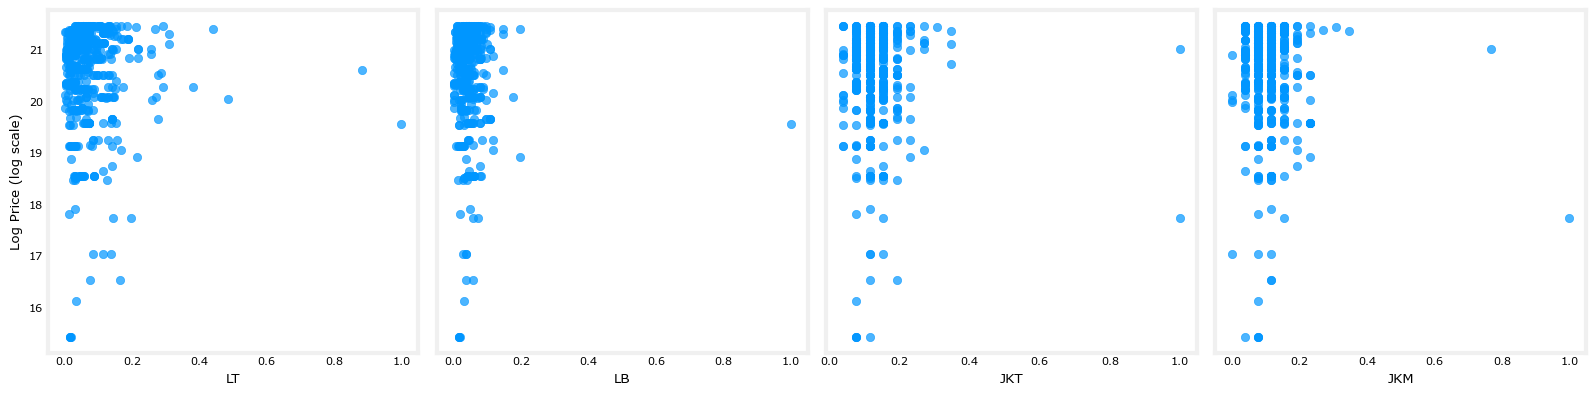

In [7]:
# Normalisasi fitur
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Log-transformasi target
y_train_log = np.log1p(y_train)  # log(1 + harga) untuk menghindari log(0)

# Plotting setelah normalisasi
fig, ax = plt.subplots(1, len(X_features), figsize=(16, 4), sharey=True)

for i, feature in enumerate(X_features):
    ax[i].scatter(X_train_scaled[:, i], y_train_log, alpha=0.7)
    ax[i].set_xlabel(feature)

ax[0].set_ylabel("Log Price (log scale)")
plt.tight_layout()
plt.show()


Nampaknya dari hasil plot data yang telah di transformasi pun, tidak menunjukkan adanya korelasi yang kuat. Maka dari itu, kami mencoba untuk membuatt boxplot fitur data dan melihat apakah terdapat pencilan. 

In [8]:
import seaborn as sns

# Plot distribusi fitur untuk memeriksa outlier
fig, axes = plt.subplots(1, len(X_features), figsize=(16, 4))

for i, feature in enumerate(X_features):
    sns.boxplot(y=X_train[feature], ax=axes[i])
    axes[i].set_title(f"Boxplot of {feature}")

plt.tight_layout()
plt.show()


Kelihatannya terdapat banyak sekali pencilan pada data fitur. Untuk kedepannya, kami menghapus outlier tersebut dan menaruhnya pada dataset baru

In [9]:
# Menghapus outlier berdasarkan metode IQR (Interquartile Range)
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Hapus outlier untuk setiap fitur
for feature in X_features:
    data = remove_outliers(data, feature)

# Update X_train dan y_train setelah outlier dihapus
X_train = data[X_features]
y_train = data['HARGA']


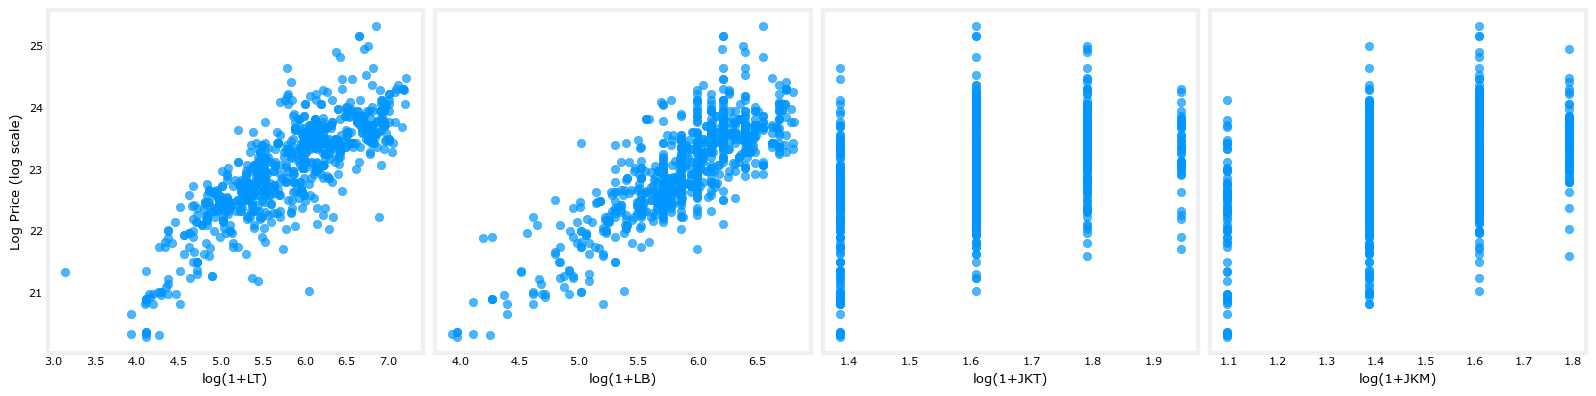

In [10]:
# Transformasi log pada fitur dan target
X_train_log = X_train.copy()
for feature in ['LT', 'LB', 'JKT', 'JKM']:
    X_train_log[feature] = np.log1p(X_train[feature])

y_train_log = np.log1p(y_train)

# Gabungkan untuk memastikan tidak ada missing values
data_combined = pd.concat([X_train_log, y_train_log], axis=1)
data_combined = data_combined.dropna()

# Pisahkan kembali X_train_log dan y_train_log
X_train_log = data_combined[X_features]
y_train_log = data_combined['HARGA']

# Plot scatter plot
fig, ax = plt.subplots(1, len(X_features), figsize=(16, 4), sharey=True)

for i, feature in enumerate(X_features):
    ax[i].scatter(X_train_log[feature], y_train_log, alpha=0.7)
    ax[i].set_xlabel(f"log(1+{feature})")

ax[0].set_ylabel("Log Price (log scale)")
plt.tight_layout()
plt.show()


Terlihat bahwa distribusi data jadi lebih merata. 

Dapat dilihat bahwa fitur 'LT' dan 'LB' nampaknya memiliki korelasi yang kuat terhadap harga rumah

Data yang telah ditransformasi, kita konversi ke array NumPy agar kedepannya proses pembelajaran data menjadi mudah

In [13]:
import numpy as np

X_train_np = X_train_log.to_numpy()  # Konversi DataFrame ke array NumPy
y_train_np = y_train_log.to_numpy()  # Konversi Series ke array NumPy


In [15]:
from sklearn.linear_model import LinearRegression

# === Model Linear Regression ===
model = LinearRegression()
model.fit(X_train_np, y_train_np)  # Melatih model dengan data training

# === Output Model ===
coefficients = model.coef_  # Koefisien regresi
intercept = model.intercept_  # Intersep regresi

# === Persamaan Regresi ===
print("Coefficients (w):", coefficients)
print("Intercept (b):", intercept)
print("\nPersamaan Regresi:")
print(f"HARGA = {intercept:.2f} + ({coefficients[0]:.2f} * LT) + ({coefficients[1]:.2f} * LB) + "
      f"({coefficients[2]:.2f} * JKT) + ({coefficients[3]:.2f} * JKM)")

# === Prediksi pada Data Training ===
y_pred_train = model.predict(X_train_np)

# === Evaluasi Model (Opsional) ===
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_train_np, y_pred_train)
r2 = r2_score(y_train_np, y_pred_train)

print("\nEvaluasi Model:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")


Coefficients (w): [ 0.52  0.7  -0.29  0.17]
Intercept (b): 16.093963820341322

Persamaan Regresi:
HARGA = 16.09 + (0.52 * LT) + (0.70 * LB) + (-0.29 * JKT) + (0.17 * JKM)

Evaluasi Model:
Mean Squared Error (MSE): 0.15
R-squared (R²): 0.77


### **Penjelasan Kode**

1. **Model Training**:
    - `LinearRegression().fit()` digunakan untuk melatih model regresi menggunakan XtrainX_{train}Xtrain​ dan ytrainy_{train}ytrain​.
2. **Persamaan Regresi**:
    - Nilai koefisien (www) dan intersep (bbb) diekstraksi untuk membentuk persamaan regresi
3. **Prediksi**:
    - Model memprediksi harga rumah pada data training .
4. **Evaluasi**:
    - **Mean Squared Error (MSE)**: Mengukur rata-rata kesalahan kuadrat antara prediksi dan nilai sebenarnya.
    - **R-squared (R²)**: Mengukur seberapa baik model menjelaskan variabilitas data.

### **Interpretasi Koefisien Regresi (w):**

1. **LT (Luas Tanah)**: Koefisien sebesar **0.52** menunjukkan bahwa setiap peningkatan satu unit luas tanah akan meningkatkan log-harga rumah sebesar **0.52**, dengan asumsi variabel lain tetap konstan.
2. **LB (Luas Bangunan)**: Koefisien sebesar **0.70** menunjukkan bahwa setiap peningkatan satu unit luas bangunan akan meningkatkan log-harga rumah sebesar **0.70**, dengan asumsi variabel lain tetap konstan. Ini adalah variabel dengan dampak paling besar pada harga.
3. **JKT (Jumlah Kamar Tidur)**: Koefisien negatif sebesar **-0.29** menunjukkan bahwa penambahan satu kamar tidur justru **mengurangi** log-harga rumah sebesar **0.29**. Hal ini bisa jadi disebabkan oleh hubungan yang tidak linear atau pengaruh variabel lain yang belum tertangkap.
4. **JKM (Jumlah Kamar Mandi)**: Koefisien sebesar **0.17** menunjukkan bahwa setiap penambahan satu kamar mandi akan meningkatkan log-harga rumah sebesar **0.17**.

---

### **Interpretasi Intercept (b):**

- **Intercept sebesar 16.09** merepresentasikan nilai log-harga rumah ketika semua variabel independen (LT, LB, JKT, JKM) bernilai nol. Dalam konteks regresi log-linear, ini adalah titik awal (baseline) dari model prediksi.

---

### **Evaluasi Model:**

1. **Mean Squared Error (MSE)**:
    - Nilai **0.15** menunjukkan bahwa rata-rata kesalahan kuadrat antara log-harga prediksi dan log-harga aktual cukup kecil, sehingga model ini relatif akurat.
2. **R-squared (R²)**:
    - Nilai **0.77** menunjukkan bahwa model dapat menjelaskan **77% variabilitas** dari log-harga rumah. Meskipun bukan nilai yang sempurna, ini cukup baik untuk sebuah model prediksi

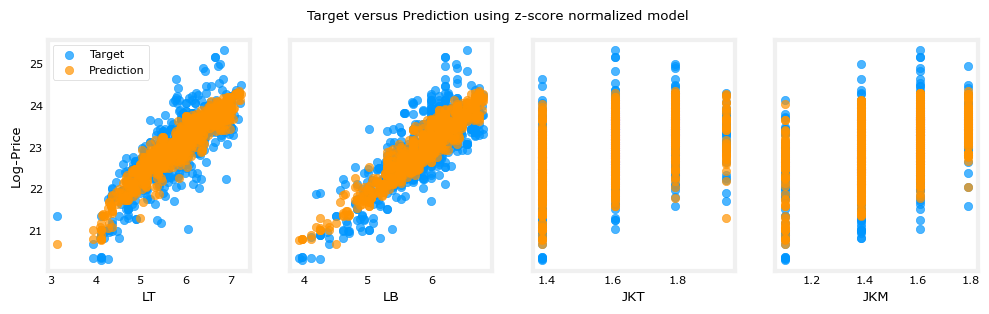

In [25]:
import matplotlib.pyplot as plt

# Pastikan Anda memiliki prediksi y_pred dari model
y_pred = model.predict(X_train_np)

# Nama fitur untuk label x-axis
X_features = ['LT', 'LB', 'JKT', 'JKM']

# Plot target dan prediksi terhadap fitur asli
fig, ax = plt.subplots(1, 4, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train_np[:, i], y_train_np, label='Target', alpha=0.7)  # Plot target
    ax[i].scatter(X_train_np[:, i], y_pred, color=dlorange, label='Prediction', alpha=0.7)  # Plot prediksi
    ax[i].set_xlabel(X_features[i])

ax[0].set_ylabel("Log-Price")  # Label y-axis
ax[0].legend()  # Tambahkan legenda
fig.suptitle("Target versus Prediction using z-score normalized model")  # Judul plot
plt.show()
